In [1]:
import requests 
import json
import os
from dotenv import load_dotenv
import pandas as pd
from pandas import json_normalize
import time
load_dotenv()
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [31]:
#carga stone_enriquecido
Stones_Last = pd.read_csv("../data/stone_500_rich.csv")
Stones_Last.drop(["Unnamed: 0"], axis = 1, inplace = True)
Stones_Last.sample(3)

,Number,Year,Album,Artist,Gen,Subgenre,playcount,listeners
184,185,1968,Beggars Banquet,The Rolling Stones,rock,NaN,6019939,598482
65,66,1965,A Love Supreme,John Coltrane,jazz,NaN,2006016,192786
315,316,1967,The Who Sell Out,The Who,rock,NaN,2525946,142843


In [32]:
Spotify_500 = pd.read_csv("../data/Spotify_500.csv")
Spotify_500.drop(["Unnamed: 0"], axis = 1, inplace = True)
Spotify_500.sample(3)

,Rank,Artist,Album,Total,Daily
347,348,P!nk,The Truth About Love,1640984588,990907
197,198,OneRepublic,Native (Deluxe),2216782931,1124506
408,409,Sam Hunt,Montevallo,1467984558,375581


In [33]:
top50_lastfm = pd.read_csv("../data/top50_lastfm.csv")
top50_lastfm.drop(["Unnamed: 0"], axis = 1, inplace = True)
top50_lastfm.sample(3)

,name,playcount,listeners
19,Ed Sheeran,125523151,2288584
0,Kanye West,466143817,5189790
31,Mac Miller,107820070,1620951


In [34]:
top_sells = pd.read_csv("../data/top_sells.csv")
top_sells.drop(["Unnamed: 0"], axis = 1, inplace = True)
top_sells.sample(3)

,Rank,Artist,Title,Millions
19,31,Britney Spears,...Baby One More Time,14
14,36,Backstreet Boys,Millennium,13
46,4,AC/DC,Back In Black,25


In [7]:
Stones_Last.columns

Index(['Number', 'Year', 'Album', 'Artist', 'Gen', 'Subgenre', 'playcount',
       'listeners'],
      dtype='object')

In [35]:
Albums = pd.DataFrame(Stones_Last.groupby(["Artist"])["Album"].count()).reset_index()

In [36]:
Albums 

,Artist,Album
0,2Pac,1
1,50 Cent,1
2,A Tribe Called Quest,2
3,ABBA,1
4,AC/DC,1
...,...,...
337,X,1
338,X‐Ray Spex,1
339,Yeah Yeah Yeahs,1
340,Yes,1


In [37]:
#agg({"Pclass": "count"})
#aletas = penguins.groupby("species").agg({"bill_length_mm": "mean","bill_depth_mm": "mean", "flipper_length_mm": "mean" })
Albums = Stones_Last.groupby(["Artist"]).agg({"Number": "min","Album" :"count","playcount":"sum","listeners":"sum"}).reset_index()

In [38]:
#df.sort_values(by=['Skill','EmpID'],ascending=[True,False])
top10 = Albums.sort_values(by=["Album","listeners"],ascending=[False,False])

In [40]:
top10.head(10)

,Artist,Number,Album,playcount,listeners
281,The Beatles,5,9,174054342,5759723
35,Bob Dylan,9,7,51982102,2997669
144,Kanye West,17,6,244191135,8263176
302,The Rolling Stones,14,6,41889358,3977117
157,Led Zeppelin,58,5,54302379,3100320
45,Bruce Springsteen,21,5,26539937,1806962
68,David Bowie,40,5,31399487,1427304
233,Radiohead,20,4,277412985,7972756
221,Pink Floyd,55,4,109784885,3684287
270,Stevie Wonder,4,4,14657588,1698675


In [41]:
corr = Stones_Last.corr()
corr

,Number,Year,playcount,listeners
Number,1.000000,0.125785,-0.132329,-0.215689
Year,0.125785,1.000000,0.468096,0.345862
playcount,-0.132329,0.468096,1.000000,0.853053
listeners,-0.215689,0.345862,0.853053,1.000000


In [43]:
Stones_Last.head(10)

,Number,Year,Album,Artist,Gen,Subgenre,playcount,listeners
0,1,1971,What's Going On,Marvin Gaye,r&b,NaN,5218718,543969
1,2,1966,Pet Sounds,The Beach Boys,rock,NaN,13404548,543460
2,3,1971,Blue,Joni Mitchell,folk,NaN,9341522,534964
3,4,1976,Songs in the Key of Life,Stevie Wonder,soul,NaN,7645505,756100
4,5,1969,Abbey Road,The Beatles,rock,NaN,42687089,1071346
5,6,1991,Nevermind,Nirvana,grunge,NaN,45544014,2463939
6,7,1977,Rumours,Fleetwood Mac,pop,NaN,23169995,1117937
7,8,1984,Purple Rain,Prince and The Revolution,rock,NaN,28699,3885
8,9,1975,Blood on the Tracks,Bob Dylan,folk,NaN,9226360,490751
9,10,1998,The Miseducation of Lauryn Hill,Lauryn Hill,r&b,NaN,9417617,780979


In [44]:
Stones_Last["Art_Alb"] = Stones_Last["Artist"] +"-"+ Stones_Last["Album"]
Stones_Last["Pos_Alb"] = Stones_Last["Number"].astype(str) +"-"+ Stones_Last["Album"]

In [45]:
Stones_Last

,Number,Year,Album,Artist,Gen,Subgenre,playcount,listeners,Art_Alb,Pos_Alb
0,1,1971,What's Going On,Marvin Gaye,r&b,NaN,5218718,543969,Marvin Gaye-What's Going On,1-What's Going On
1,2,1966,Pet Sounds,The Beach Boys,rock,NaN,13404548,543460,The Beach Boys-Pet Sounds,2-Pet Sounds
2,3,1971,Blue,Joni Mitchell,folk,NaN,9341522,534964,Joni Mitchell-Blue,3-Blue
3,4,1976,Songs in the Key of Life,Stevie Wonder,soul,NaN,7645505,756100,Stevie Wonder-Songs in the Key of Life,4-Songs in the Key of Life
4,5,1969,Abbey Road,The Beatles,rock,NaN,42687089,1071346,The Beatles-Abbey Road,5-Abbey Road
...,...,...,...,...,...,...,...,...,...,...
495,496,1998,¿Dónde están los ladrones?,Shakira,pop,NaN,376264,11475,Shakira-¿Dónde están los ladrones?,496-¿Dónde están los ladrones?
496,497,1985,The Indestructible Beat of Soweto,Various Artists,mbaqanga,south african,10677,911,Various Artists-The Indestructible Beat of Soweto,497-The Indestructible Beat of Soweto
497,498,1977,Suicide,Suicide,rock,NaN,1497787,144580,Suicide-Suicide,498-Suicide
498,499,1977,Ask Rufus,Rufus,r&b,NaN,48081,8896,Rufus-Ask Rufus,499-Ask Rufus


<AxesSubplot:xlabel='listeners', ylabel='Number'>

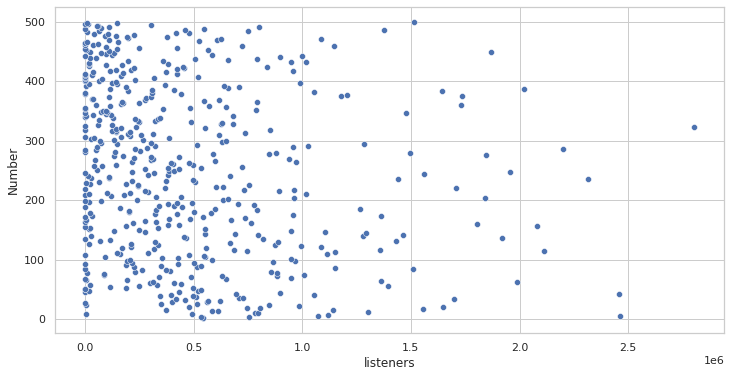

In [49]:
#correlacion entre el Rank de Stones y los listeners del artista.
#sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="bill_length_mm", style="island");
sns.scatterplot (x = "listeners", y ="Number", data = Stones_Last)

In [50]:
fig = px.scatter(Stones_Last.head(20), x="Album", y="listeners")
fig.show()

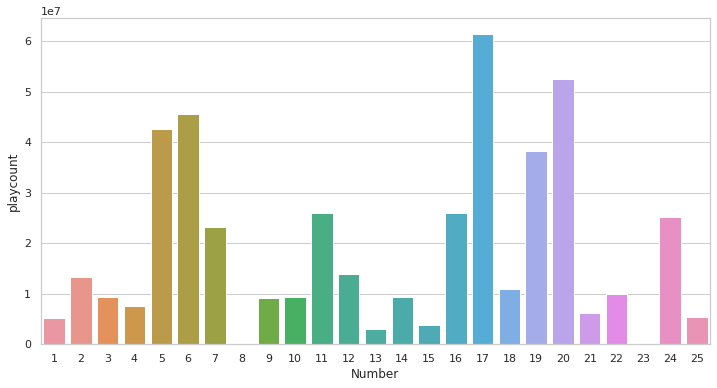

In [53]:
barplot = sns.barplot(x="Number", y="playcount", data=Stones_Last.head(25),ci="sd");

In [28]:
fig = px.bar(Stones_Last.head(20), x="Art_Alb", y="listeners",color = "Number")
fig.show()

In [29]:
top50_lastfm.head(10)

,name,playcount,listeners
0,Kanye West,466143817,5189790
1,The Weeknd,211180150,2233916
2,Doja Cat,95666679,1124126
3,Billie Eilish,143295949,1435715
4,Coldplay,426431295,6080834
5,Drake,253064018,4134685
6,Taylor Swift,539134180,3009196
7,Lil Nas X,45499397,1104082
8,Adele,153353764,3426494
9,Ariana Grande,288187641,1901438


In [30]:
Stones_Last.sort_values(by=["playcount","listeners"],ascending=[True,True]).head(10)

,Number,Year,Album,Artist,Gen,Subgenre,playcount,listeners,Art_Alb,Pos_Alb
411,412,1965,Going to a Go‐Go,Smokey Robinson and The Miracles,soul,NaN,12,1,Smokey Robinson and The Miracles-Going to a Go‐Go,412-Going to a Go‐Go
66,67,1996,Reasonable Doubt,Jaÿ‐Z,hip-hop,NaN,18,4,Jaÿ‐Z-Reasonable Doubt,67-Reasonable Doubt
197,198,1979,The B‐52's,The B‐52's,new wave,alternative,52,8,The B‐52's-The B‐52's,198-The B‐52's
461,462,1969,The Gilded Palace of Sin,The Flying Burrito Bros.,country,rock,120,8,The Flying Burrito Bros.-The Gilded Palace of Sin,462-The Gilded Palace of Sin
399,400,1981,Beauty and the Beat,The Go‐Go's,new wave,rock,120,17,The Go‐Go's-Beauty and the Beat,400-Beauty and the Beat
380,381,1973,(pronounced 'lĕh‐'nérd 'skin‐'nérd),Lynyrd Skynyrd,rock,NaN,291,38,Lynyrd Skynyrd-(pronounced 'lĕh‐'nérd 'skin‐'n...,381-(pronounced 'lĕh‐'nérd 'skin‐'nérd)
92,93,1997,Supa Dupa Fly,Missy Misdemeanor Elliott,hip-hop,NaN,352,50,Missy Misdemeanor Elliott-Supa Dupa Fly,93-Supa Dupa Fly
84,85,1970,John Lennon/Plastic Ono Band,John Lennon/Plastic Ono Band,rock,NaN,401,42,John Lennon/Plastic Ono Band-John Lennon/Plast...,85-John Lennon/Plastic Ono Band
245,246,1990,Mama Said Knock You Out,L.L. Cool J,hip-hop,NaN,479,74,L.L. Cool J-Mama Said Knock You Out,246-Mama Said Knock You Out
377,378,1984,Run‐D.M.C.,Run‐D.M.C.,hip-hop,NaN,591,117,Run‐D.M.C.-Run‐D.M.C.,378-Run‐D.M.C.
